In [2]:
import re
import ast
# import emot
import nltk
import string
# import pycountry
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
def replace_emoji(text):
    emot_obj = emot.core.emot()
    emotes = emot_obj.emoji(text)
    for i in range(len(emotes['value'])):
        text = text.replace(emotes['value'][i], emotes['mean'][i])
    return text


def normalize(text):
    link_pattern = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
    text = re.sub(link_pattern, '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = replace_emoji(text)
    text = text.replace('\n',' ')
    return text


In [5]:
d1 = pd.read_csv("missingbaby.csv")
d2 = pd.read_csv("tweets_data2.csv")
pd.set_option('float_format', '{:.0f}'.format)

In [6]:
d1 = d1.drop(columns=['Unnamed: 0','IDreplyTo'])

In [7]:
d2 = d2.drop(columns = ['Unnamed: 12','Unnamed: 0','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'])
d2


,username,description,location,following,followers,totaltweets,retweetcount,link,text,hashtags,tweetdate
0,JISTLAB_,⛅️ 🇨🇦🇲🇦 IG ~ JISTLAB,"Montréal, Québec",160,135,48087,22,https://twitter.com/i/web/status/1632739441830...,"Runaway British Mum, Constance Marten, Charged...",[],2023-03-06 13:46:32+00:00
1,Abdul42920472,NaN,NaN,68,2,310,26,https://twitter.com/i/web/status/1632735132611...,Detectives continue to quiz Constance Marten a...,[],2023-03-06 13:29:25+00:00
2,VaclavusU,"US,UK,World Politics,ShowBiz,Sport Celebrities...","SE 256th street Kent, WA, USA",54,17,24121,0,https://twitter.com/i/web/status/1632731896047...,Constance Marten and Mark Gordon blow each oth...,[],2023-03-06 13:16:33+00:00
3,VaclavusU,"US,UK,World Politics,ShowBiz,Sport Celebrities...","SE 256th street Kent, WA, USA",54,17,24121,0,https://twitter.com/i/web/status/1632731355392...,Constance Marten and Mark Gordon named baby be...,[],2023-03-06 13:14:24+00:00
4,colinwitcher,Barrister specialising in General Crime and Bu...,"London, England",1649,2524,2234,1,https://twitter.com/i/web/status/1632721208163...,Lewis Power KC and @colinwitcher instructed on...,[],2023-03-06 12:34:05+00:00
...,...,...,...,...,...,...,...,...,...,...,...
9796,stuartITV,Programme Editor at @itvnews / @itn. Thoughts ...,"Forest Hill, England",939,1505,16627,68,https://twitter.com/i/web/status/1630383684137...,#UPDATE | Constance Marten and Mark Gordon wer...,['UPDATE'],NaN
9797,janamb,"my world changed in an instant, treasure what ...",Worcester UK,2388,1321,45753,68,https://twitter.com/i/web/status/1630383457959...,#UPDATE | Constance Marten and Mark Gordon wer...,['UPDATE'],NaN
9798,Mel_Storni,"News, history, art, curious info of the world....",USA,354,972,569918,68,https://twitter.com/i/web/status/1630383109760...,#UPDATE | Constance Marten and Mark Gordon wer...,['UPDATE'],NaN
9799,metpoliceuk,London's Metropolitan Police Service. \n\nPlea...,London,793,1329842,33358,68,https://twitter.com/i/web/status/1630382776175...,#UPDATE | Constance Marten and Mark Gordon wer...,['UPDATE'],NaN


In [8]:

data = pd.merge(d1, d2, on=['username', 'description', 'location', 'link','text','hashtags','tweetdate'], how='outer')


In [9]:
data.head()

,tweetID,username,description,location,following_x,followers_x,totaltweets_x,retweetcount_x,tweetdate,likes,link,text,hashtags,following_y,followers_y,totaltweets_y,retweetcount_y
0,1634665979585380352,abt_live,"ABT LIVE covers breaking news, and the latest ...",India,10,767,69814,0,2023-03-11 21:21:54+00:00,0,https://twitter.com/i/web/status/1634665979585...,Constance Marten: Dead baby called Victoria fo...,"['eastsussex', 'brighton', 'metropolitanpolice...",NaN,NaN,NaN,NaN
1,1634463934710177792,ATGBrokers,"ATGBrokers Group,\n( Founder/Owner )\n\nBreaki...",on Earth!,260,132,626868,0,2023-03-11 07:59:03+00:00,0,https://twitter.com/i/web/status/1634463934710...,News (Baby's body found in plastic bag in shed...,[],NaN,NaN,NaN,NaN
2,1634386605480738816,Jane__8805,Ноrnу wоman 💥😼💐,NaN,176,2,316,1,2023-03-11 02:51:46+00:00,0,https://twitter.com/i/web/status/1634386605480...,"Absolutely heartbreaking, RIP bubba 💔💔 #consta...",['constancemartin'],NaN,NaN,NaN,NaN
3,1634157693530173440,gerrard7281,I will always love football ⚽️,United Kingdom,58,303,267,54,2023-03-10 11:42:09+00:00,241,https://twitter.com/i/web/status/1634157693530...,"""We believe sadly the baby may have been dead ...",[],NaN,NaN,NaN,NaN
4,1634157676849405952,gerrard7281,I will always love football ⚽️,United Kingdom,58,303,267,88,2023-03-10 11:42:05+00:00,550,https://twitter.com/i/web/status/1634157676849...,Constance Marten and Mark Gordon charged with ...,[],NaN,NaN,NaN,NaN


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples  # Example import for tweets
from nltk.tokenize import TweetTokenizer  # Example import for tweet normalization
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('twitter_samples')

# Example tweets from NLTK corpus
tweets = twitter_samples.strings('positive_tweets.json')

# Example normalization function (custom implementation may be needed)
def normalize(tweet):
    tokenizer = TweetTokenizer()
    return ' '.join(tokenizer.tokenize(tweet))

analyzer = SentimentIntensityAnalyzer()

# Define a dictionary to map the sentiment scores to emotions
emotion_dict = {
    'angry': 0,
    'upset': 0,
    'neutral': 0,
    'curious': 0,
    'happy': 0
}

all_scores = []

# Loop through each tweet and determine the emotion
for tweet in tweets:
    # Get the sentiment score for the tweet
    sentiment_score = analyzer.polarity_scores(normalize(tweet))
    all_scores.append(sentiment_score)

    # Determine the emotion based on the sentiment score
    if sentiment_score['neg'] > sentiment_score['pos']:
        if sentiment_score['neg'] > sentiment_score['neu']:
            emotion_dict['angry'] += 1
        else:
            emotion_dict['upset'] += 1
    elif sentiment_score['pos'] > sentiment_score['neg']:
        if sentiment_score['pos'] > sentiment_score['neu']:
            emotion_dict['happy'] += 1
        else:
            emotion_dict['curious'] += 1
    else:
        if sentiment_score['neu'] > 0.5:
            emotion_dict['neutral'] += 1

print("Emotion counts:", emotion_dict)
print("All sentiment scores:", all_scores)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


Emotion counts: {'angry': 37, 'upset': 141, 'neutral': 16, 'curious': 3058, 'happy': 1746}
All sentiment scores: [{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7579}, {'neg': 0.145, 'neu': 0.585, 'pos': 0.27, 'compound': 0.6229}, {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.7959}, {'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'compound': 0.7983}, {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.795}, {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597}, {'neg': 0.063, 'neu': 0.417, 'pos': 0.52, 'compound': 0.9466}, {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.25}, {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7615}, {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.5423}, {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.5859}, {'neg': 0.206, 'neu': 0.611, 'pos': 0.183, 'compound': -0.0946}, {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}, {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7717}, {'neg': 0.0, 'ne

In [11]:
# Print the count of each emotion
for emotion, count in emotion_dict.items():
    print(f"{emotion}: {count}")

angry: 37
upset: 141
neutral: 16
curious: 3058
happy: 1746


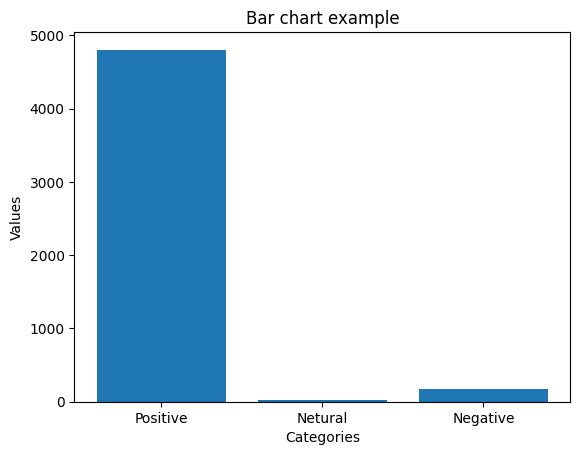

In [12]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])

scores = np.array(compound_scores)

x = np.array(['Positive', 'Netural', 'Negative'])
y = np.array([np.sum(scores > 0), np.sum(scores == 0), np.sum(scores < 0)])

# Create bar chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar chart example')

# Show chart
plt.show()

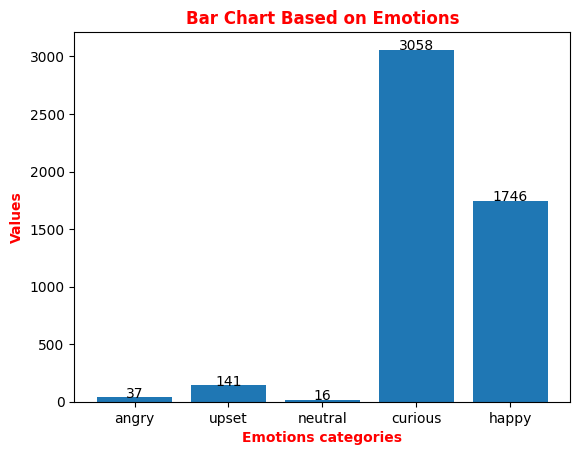

In [13]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])

scores = np.array(compound_scores)

x = np.array([emotion for emotion in emotion_dict.keys()])
y = np.array([emotion[1] for emotion in emotion_dict.items()])

# Create bar chart
plt.bar(x, y)

# Write the number of each bar above it
for i, v in enumerate(y):
    plt.text(i, v + 0.2, str(v), ha='center')

# Add labels and title
plt.xlabel('Emotions categories', fontweight="bold", color="red")
plt.ylabel('Values', fontweight="bold", color="red")
plt.title('Bar Chart Based on Emotions', fontweight="bold", color="red")

# Show chart
plt.show()


In [14]:
STOP_WORDS = stopwords.words()

# removing the emojies
# https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    text = EMOJI_PATTERN.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

max_rows = 1000

dt = data['text'].apply(cleaning)

word_count = Counter(" ".join(dt).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['tag word', 'Frequency'])
print('tags frequency:')
word_frequency

tags frequency:


,tag word,Frequency
0,constance,8985
1,marten,7866
2,baby,7793
3,mark,5873
4,gordon,5447
5,police,4118
6,found,3680
7,missing,3456
8,search,2709
9,arrested,2701


In [15]:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'username': ['user1', 'user2', 'user3', 'user1', 'user4', 'user5', 'user2'],
    'followers': [100, 150, 200, 100, 250, 300, 150]
})

# Sort by 'followers' in descending order, drop duplicates by 'username', and select top 20
top_users = (data.sort_values(by='followers', ascending=False)
                 .drop_duplicates(subset='username')
                 .head(20)[['username', 'followers']])

print(top_users)


  username  followers
5    user5        300
4    user4        250
2    user3        200
1    user2        150
0    user1        100


In [ ]:
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pycountry

# Sample DataFrame
data = pd.DataFrame({
    'username': ['user1', 'user2', 'user3', 'user4', 'user5'],
    'location': ['New York, USA', 'London, UK', 'Berlin, Germany', 'Paris, France', None]
})

# Drop duplicates based on username and get the 'location' column
locations = data.drop_duplicates(subset='username')['location']

processed_locations = []
for location in locations:
    if isinstance(location, str):
        location = location.split(', ')
        processed_locations.append(location)

country_counter = {}

# Get all countries
all_countries = list(pycountry.countries)

# Initialize the counter dictionary
for country in all_countries:
    country_counter[country.name] = 0

country_counter['Unknown'] = 0

# Count occurrences of each country in the processed locations
for item in processed_locations:
    matched = False
    for country in all_countries:
        if country.name in item or country.alpha_2 in item or country.alpha_3 in item or country.flag in item:
            country_counter[country.name] += 1
            matched = True
            break
    if not matched:
        country_counter['Unknown'] += 1

# Sort the countries by count in descending order
sorted_countries = dict(sorted(country_counter.items(), key=lambda x: x[1], reverse=True))

print(sorted_countries)


In [ ]:
dict_for_drawing_chart = {}

# set the threshold value
threshold = 10

for country in sorted_countries.items():
    if country[1] > threshold:
        dict_for_drawing_chart[country[0]] = country[1]


# sum the values less than the threshold
total = sum(value for value in sorted_countries.values() if value < threshold)

dict_for_drawing_chart['Others'] = total

In [ ]:
import math
# data for the pie chart


summation = sum(value for value in dict_for_drawing_chart.values())





labels = np.array([country[0] for country in dict_for_drawing_chart.items()])

sizes = np.array([country[1] for country in dict_for_drawing_chart.items()])



# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Countries based on tweets', fontweight="bold", color="blue", fontsize=20)

# display the chart
plt.show()

In [ ]:
locations = data.drop_duplicates(subset='username')['location']

processed_locations = []
for location in locations:
    if type(location) == str:
        location = location.split(', ')
        processed_locations.append(location)

country_counter = {}

# get all countries
all_countries = list(pycountry.countries)


for country in all_countries:
    if country.name == 'United Kingdom':
        GB = country

GB_tweets = []

for item in processed_locations:
    if GB.name in item:
        GB_tweets.append(item)
    elif GB.alpha_2 in item:
        GB_tweets.append(item)
    elif GB.alpha_3 in item:
        GB_tweets.append(item)
    elif GB.flag in item:
        GB_tweets.append(item)



In [ ]:
GB_names = [GB.name, GB.alpha_2, GB.alpha_3, GB.flag]
unknown_city = 0
cities ={}
for items in GB_tweets:
    for item in items:
        if item in GB_names:
            items.remove(item)
        if len(items) == 0:
            unknown_city += 1
        else:
            if items[0] in cities.keys():
                cities[items[0]] += 1
            else:
                cities[items[0]] = 1



In [ ]:
cities = dict(sorted(cities.items(), key=lambda x: x[1], reverse=True))
cities['Unknown'] = unknown_city
cities